In [1]:
# import the necessary modules 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from parameters_gLV import *
from simulate_gLV import * 
from plot_gLV import * 

In [2]:
# set a seed for reproducibility
seed = 42069

# simulate a gLV model for S = 2 species
S = 2

# generate the model parameters for a single simulation process
birth_death_rates = generate_birth_death_rates(S = S, seed = seed)
mutant_birth_death = mutant_birth_death_rate(birth_death = birth_death_rates[-1, :], seed = seed)
birth_death_rates = np.vstack([birth_death_rates, mutant_birth_death])
interaction_matrix = generate_interaction_matrix(S = S, method = "May", seed = seed)

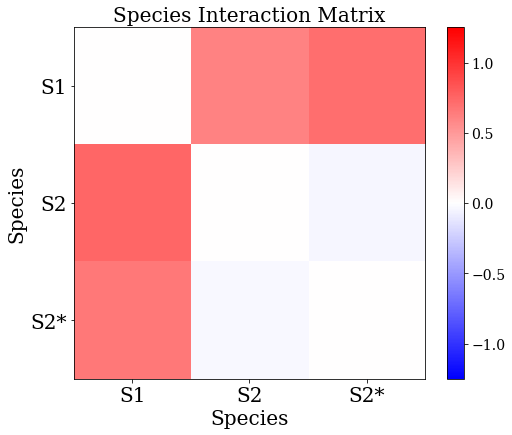

In [3]:
# plot the interaction matrix 
plot_interaction_matrix(interaction_matrix)

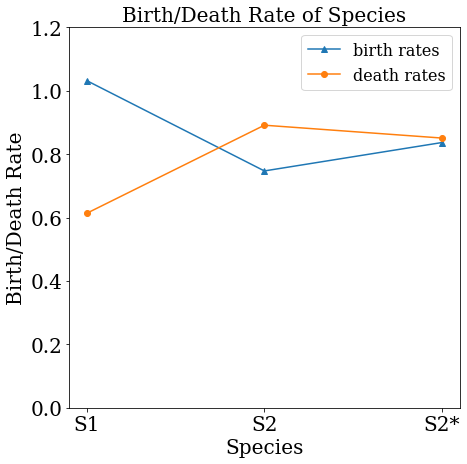

In [4]:
# plot the birth and death rates
plot_birth_death_rates(
    birth_rates=birth_death_rates[:,0], 
    death_rates=birth_death_rates[:,1]
)

In [5]:
# calculate the analytical fixation probability of the standard Moran process
fixation_probability = calculate_moran_fixation_probability(
    S = 2, 
    pop_size = 10, 
    birth_rates = birth_death_rates[:,0], 
    death_rates = birth_death_rates[:,1]
)
print(f"The fixation probability of the standard Moran process is {np.round(fixation_probability, 4)}")

The fixation probability of the standard Moran process is 0.0


In [6]:
# initialize simulation results 
success_counter = 0 # counts of mutant fixation 
reduction_counter = 0 # counts of reduction into classical Moran process
sim_lens = list() # number of transitions to absorption 
exp_wait_times = list() # length of time to absorption 
wt_states = list() # states of the wt until absorption 
mutant_states = list() # states of the mutant until absorption 

# perform 10,000 simulations
for i in range(10000): 

    # simulate a single run using the generated parameters 
    simulation_results = run_simulation(
        S = 2, 
        pop_size = 10, 
        birth_rates = birth_death_rates[:,0], 
        death_rates = birth_death_rates[:,1], 
        interaction_matrix = interaction_matrix
    )

    # store the results 
    success_counter += simulation_results[0]
    reduction_counter += np.any(simulation_results[1][:,0] == 0)
    sim_lens.append(simulation_results[1].shape[0])
    exp_wait_times.append(simulation_results[2].sum())
    wt_states.append(list(simulation_results[1][:,-2]))
    mutant_states.append(list(simulation_results[1][:,-1]))

In [7]:
# report quick results of the study
print(f"The estimated fixation probability under the gLV model is {np.round(success_counter / 10000, 4)}")
print(f"The gLV model was randomly reduced to the classical Moran process {reduction_counter} times")
print(f"The average number of transitions until absorption for the species of interst is {np.round(np.mean(sim_lens), 4)}")
print(f"The average total wait time until absorption for the species of interest is {np.round(np.mean(exp_wait_times), 4)}")

The estimated fixation probability under the gLV model is 0.0834
The gLV model was randomly reduced to the classical Moran process 742 times
The average number of transitions until absorption for the species of interst is 11.9465
The average total wait time until absorption for the species of interest is 2486.1379


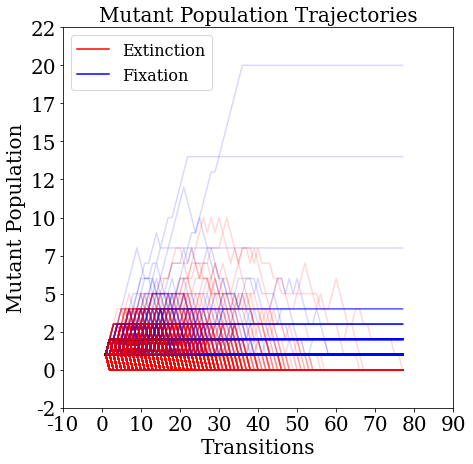

In [8]:
# plot the trajectories of the mutant 
plot_mutant_trajectories(mutant_states = mutant_states, simulation_lengths = sim_lens)

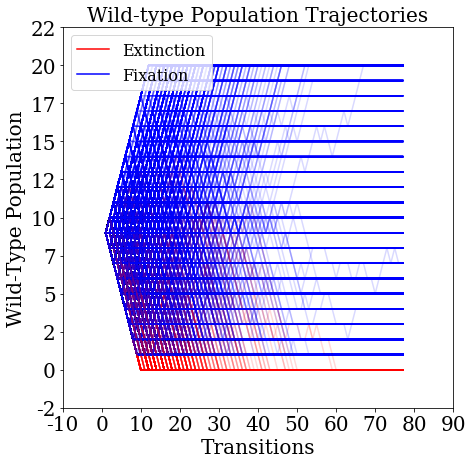

In [9]:
# plot the trajectories of the wt 
plot_wt_trajectories(wt_states = wt_states, simulation_lengths = sim_lens)